## Bibliotecas ##

In [ ]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from typing import Optional, Any

## Algoritmo da Árvore Rubro-Negra: ##

In [ ]:
class NoRBT:
    """Representa um nó na Árvore Rubro-Negra."""
    
    def __init__(self, valor: Any):
        self.valor = valor
        self.cor = "VERMELHO"
        self.pai: Optional['NoRBT'] = None
        self.esquerda: Optional['NoRBT'] = None
        self.direita: Optional['NoRBT'] = None


class ArvoreRubroNegra:
    """Implementa a estrutura principal da Árvore Rubro-Negra."""
    
    def __init__(self, visualizar_passos=False):
        self.NIL = self._cria_no_sentinela()
        self.raiz: Optional[NoRBT] = self.NIL
        self.visualizar_passos = visualizar_passos
        self.passo_atual = 0

    def _cria_no_sentinela(self) -> NoRBT:
        """Cria o nó sentinela PRETO."""
        sentinela = NoRBT(None)
        sentinela.cor = "PRETO"
        sentinela.esquerda = sentinela
        sentinela.direita = sentinela
        sentinela.pai = sentinela
        return sentinela
    
    
    def plotar_arvore(self, titulo="Árvore Rubro-Negra", destacar_no=None):
        """
        Plota a árvore usando matplotlib.
        
        Args:
            titulo: Título do gráfico
            destacar_no: Nó a ser destacado (opcional)
        """
        fig, ax = plt.subplots(figsize=(8, 6))
        ax.set_xlim(-1, 1)
        ax.set_ylim(-1, 0.1)
        ax.axis('off')
        
        if self.raiz == self.NIL:
            ax.text(0, 0, 'Árvore Vazia', ha='center', va='center', 
                   fontsize=16, bbox=dict(boxstyle='round', facecolor='wheat'))
        else:
            self._desenhar_no(ax, self.raiz, 0, 0, 0.5, destacar_no)
        
        
        vermelho_patch = mpatches.Patch(color='red', label='Nó Vermelho')
        preto_patch = mpatches.Patch(color='black', label='Nó Preto')
        ax.legend(handles=[vermelho_patch, preto_patch], loc='upper right')
        
        plt.title(titulo, fontsize=14, fontweight='bold')
        plt.tight_layout()
        plt.show()
    
    def _desenhar_no(self, ax, no, x, y, largura, destacar_no=None):
        """Desenha um nó e seus filhos recursivamente."""
        if no == self.NIL:
            return
        
        
        cor_no = 'red' if no.cor == "VERMELHO" else 'black'
        cor_texto = 'white'
        
        
        borda_cor = 'yellow' if no == destacar_no else cor_no
        borda_largura = 4 if no == destacar_no else 2
        
        
        circle = plt.Circle((x, y), 0.04, color=cor_no, zorder=3)
        ax.add_patch(circle)
        
        
        if no == destacar_no:
            highlight = plt.Circle((x, y), 0.045, color=borda_cor, 
                                  fill=False, linewidth=borda_largura, zorder=2)
            ax.add_patch(highlight)
        
        
        ax.text(x, y, str(no.valor), ha='center', va='center',
               color=cor_texto, fontsize=10, fontweight='bold', zorder=4)
        
        
        nivel_y = y - 0.15
        
        
        if no.esquerda != self.NIL:
            x_esq = x - largura
            
            ax.plot([x, x_esq], [y - 0.04, nivel_y + 0.04], 
                   'gray', linewidth=1.5, zorder=1)
            self._desenhar_no(ax, no.esquerda, x_esq, nivel_y, largura/2, destacar_no)
        
        
        if no.direita != self.NIL:
            x_dir = x + largura
            
            ax.plot([x, x_dir], [y - 0.04, nivel_y + 0.04], 
                   'gray', linewidth=1.5, zorder=1)
            self._desenhar_no(ax, no.direita, x_dir, nivel_y, largura/2, destacar_no)
    
    
    def inserir(self, valor: Any):
        """Insere um novo valor e aplica o balanceamento da RBT."""
        if self.visualizar_passos:
            self.passo_atual += 1
            print(f"\n{'='*60}")
            print(f"PASSO {self.passo_atual}: Inserindo valor {valor}")
            print(f"{'='*60}")
        
        novo_no = NoRBT(valor)
        novo_no.esquerda = self.NIL 
        novo_no.direita = self.NIL

        self._inserir_bst(novo_no)
        
        if self.visualizar_passos:
            print(f"\n→ Nó {valor} inserido como VERMELHO")
            self.plotar_arvore(f"Passo {self.passo_atual}a: Após inserção de {valor}", 
                             destacar_no=novo_no)

        if novo_no != self.NIL:
            self._balancear_apos_insercao(novo_no)
            self.raiz.cor = "PRETO"
            
            if self.visualizar_passos:
                print(f"\n→ Balanceamento concluído")
                self.plotar_arvore(f"Passo {self.passo_atual}b: Após balanceamento de {valor}")

    def _inserir_bst(self, novo_no: NoRBT):
        """Localiza a posição e insere o novo nó como em uma BST."""
        y = self.NIL
        x = self.raiz

        while x != self.NIL:
            y = x
            if novo_no.valor < x.valor:
                x = x.esquerda
            else:
                x = x.direita

        novo_no.pai = y
        
        if y == self.NIL:
            self.raiz = novo_no
        elif novo_no.valor < y.valor:
            y.esquerda = novo_no
        else:
            y.direita = novo_no
            
    
    def _rotacao_esquerda(self, no_x: NoRBT):
        """Realiza uma rotação à esquerda em torno de no_x."""
        if self.visualizar_passos:
            print(f"  ↻ Rotação à ESQUERDA em {no_x.valor}")
            
        no_y = no_x.direita 
        no_x.direita = no_y.esquerda
        if no_y.esquerda != self.NIL:
            no_y.esquerda.pai = no_x
        no_y.pai = no_x.pai
        
        if no_x.pai == self.NIL:
            self.raiz = no_y
        elif no_x == no_x.pai.esquerda:
            no_x.pai.esquerda = no_y
        else:
            no_x.pai.direita = no_y

        no_y.esquerda = no_x
        no_x.pai = no_y

    def _rotacao_direita(self, no_y: NoRBT):
        """Realiza uma rotação à direita em torno de no_y."""
        if self.visualizar_passos:
            print(f"  ↺ Rotação à DIREITA em {no_y.valor}")
            
        no_x = no_y.esquerda
        no_y.esquerda = no_x.direita
        if no_x.direita != self.NIL:
            no_x.direita.pai = no_y
        no_x.pai = no_y.pai
        
        if no_y.pai == self.NIL:
            self.raiz = no_x
        elif no_y == no_y.pai.esquerda:
            no_y.pai.esquerda = no_x
        else:
            no_y.pai.direita = no_x

        no_x.direita = no_y
        no_y.pai = no_x
    
    
    def _balancear_apos_insercao(self, no_z: NoRBT):
        """Corrige violações da Propriedade 4 (Vermelho-Vermelho)."""
        while no_z.pai.cor == "VERMELHO":
            
            if no_z.pai == no_z.pai.pai.esquerda:
                tio = no_z.pai.pai.direita
                if tio.cor == "VERMELHO":
                    if self.visualizar_passos:
                        print(f"Caso 1: Recoloração (tio vermelho)")
                    no_z.pai.cor = "PRETO"
                    tio.cor = "PRETO"
                    no_z.pai.pai.cor = "VERMELHO"
                    no_z = no_z.pai.pai
                else:
                    if no_z == no_z.pai.direita:
                        if self.visualizar_passos:
                            print(f"Caso 2: Nó é filho direito")
                        no_z = no_z.pai
                        self._rotacao_esquerda(no_z)
                    if self.visualizar_passos:
                        print(f"Caso 3: Recoloração e rotação")
                    no_z.pai.cor = "PRETO"
                    no_z.pai.pai.cor = "VERMELHO"
                    self._rotacao_direita(no_z.pai.pai)
            
            else:
                tio = no_z.pai.pai.esquerda
                if tio.cor == "VERMELHO":
                    if self.visualizar_passos:
                        print(f"  ⚡ Caso 1: Recoloração (tio vermelho)")
                    no_z.pai.cor = "PRETO"
                    tio.cor = "PRETO"
                    no_z.pai.pai.cor = "VERMELHO"
                    no_z = no_z.pai.pai
                else:
                    if no_z == no_z.pai.esquerda:
                        if self.visualizar_passos:
                            print(f"  ⚡ Caso 2: Nó é filho esquerdo")
                        no_z = no_z.pai
                        self._rotacao_direita(no_z)
                    if self.visualizar_passos:
                        print(f"  ⚡ Caso 3: Recoloração e rotação")
                    no_z.pai.cor = "PRETO"
                    no_z.pai.pai.cor = "VERMELHO"
                    self._rotacao_esquerda(no_z.pai.pai)
        
        self.raiz.cor = "PRETO"

    def buscar(self, valor: Any) -> Optional[NoRBT]:
        """Busca um valor na árvore."""
        atual = self.raiz
        while atual != self.NIL and valor != atual.valor:
            if valor < atual.valor:
                atual = atual.esquerda
            else:
                atual = atual.direita
        return atual

## Execução ##


🌳 VALORES ALEATÓRIOS GERADOS:
[82, 10, 96, 95, 38, 69, 54, 77, 43, 19, 26, 58, 81, 93, 25, 2, 40, 76, 53, 16, 33]


🌳 INSERINDO VALORES COM VISUALIZAÇÃO PASSO A PASSO


PASSO 1: Inserindo valor 82

→ Nó 82 inserido como VERMELHO


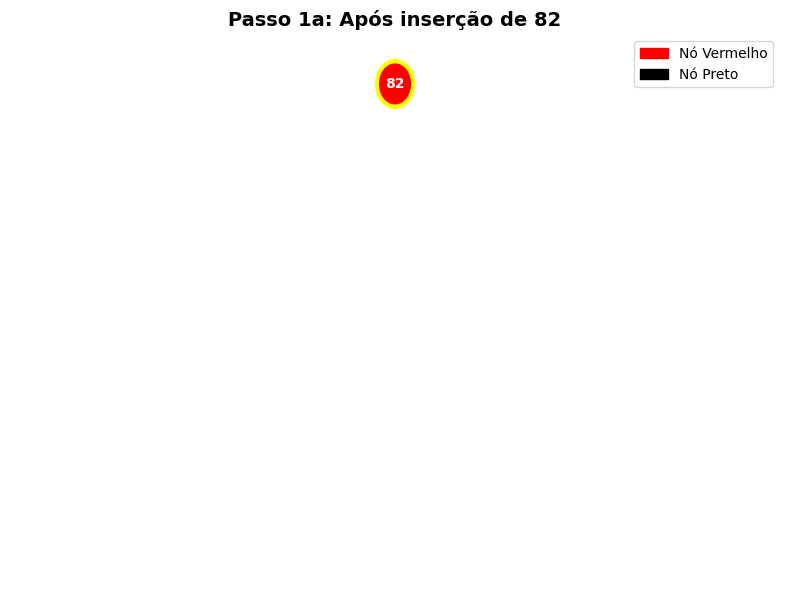


→ Balanceamento concluído


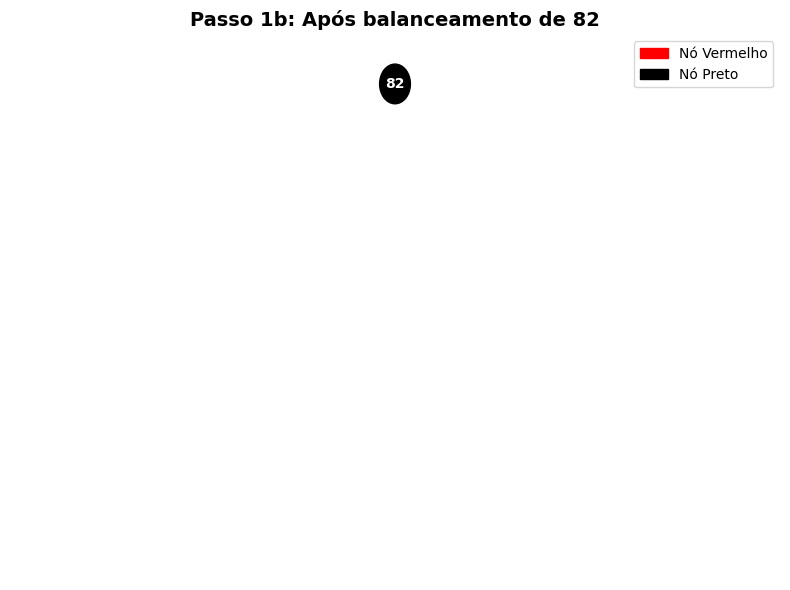


PASSO 2: Inserindo valor 10

→ Nó 10 inserido como VERMELHO


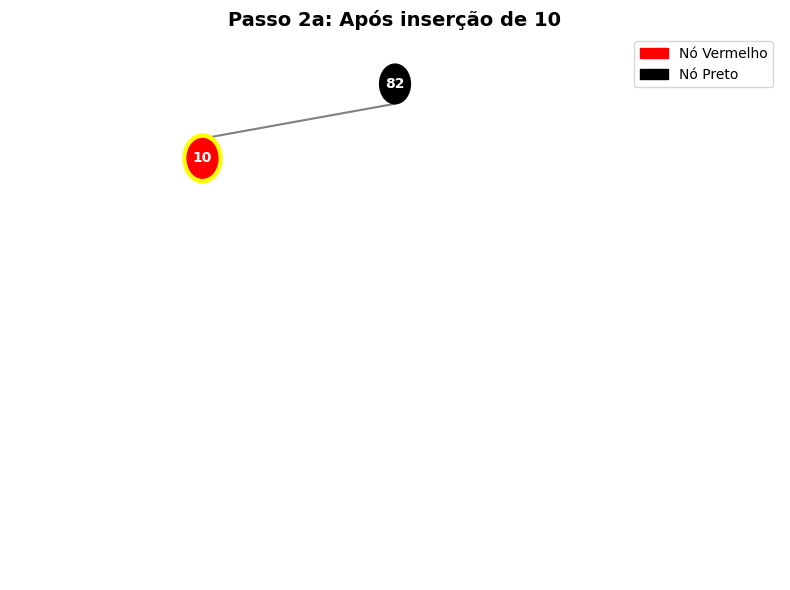


→ Balanceamento concluído


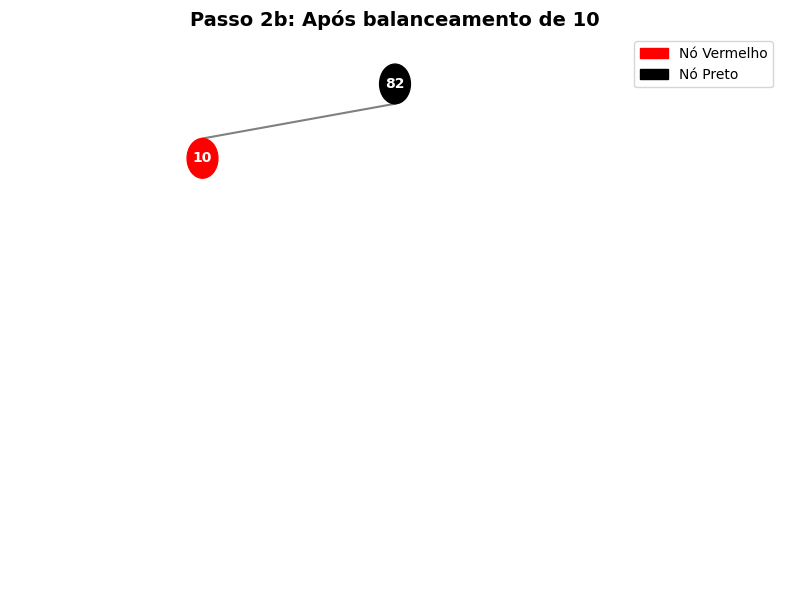


PASSO 3: Inserindo valor 96

→ Nó 96 inserido como VERMELHO


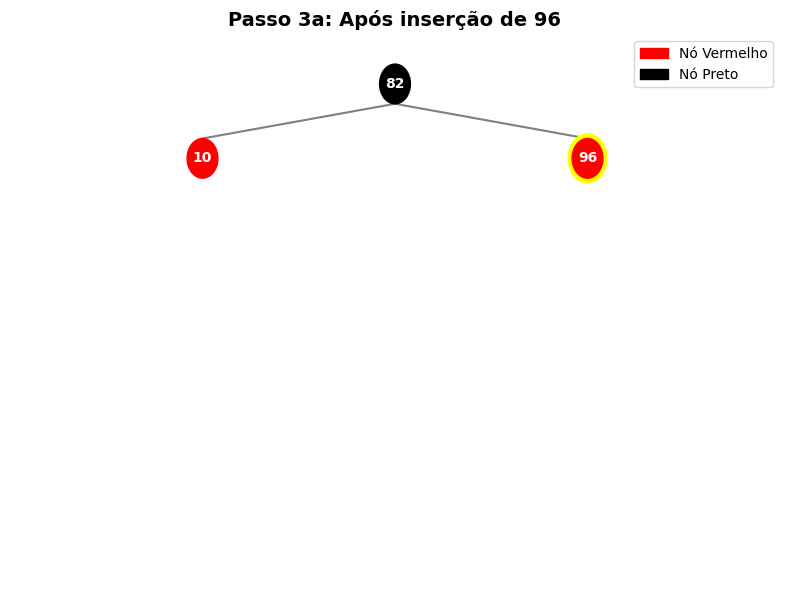


→ Balanceamento concluído


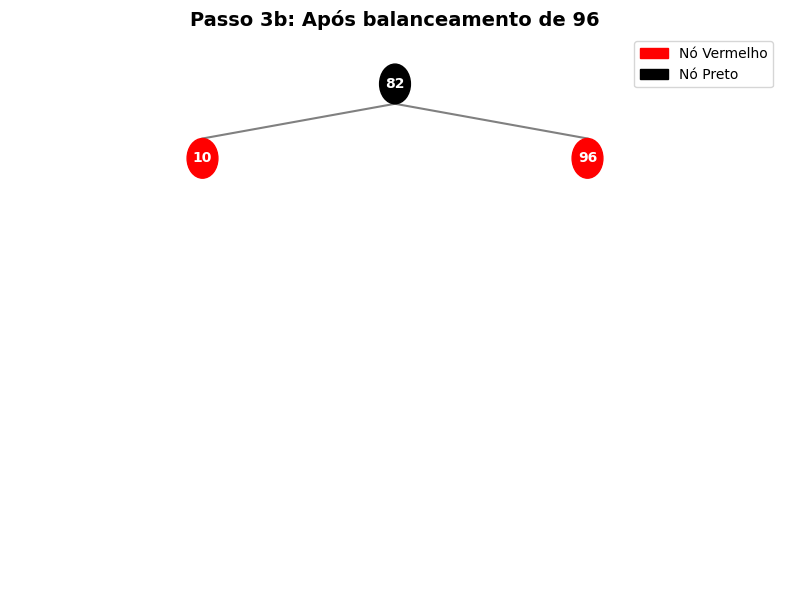


PASSO 4: Inserindo valor 95

→ Nó 95 inserido como VERMELHO


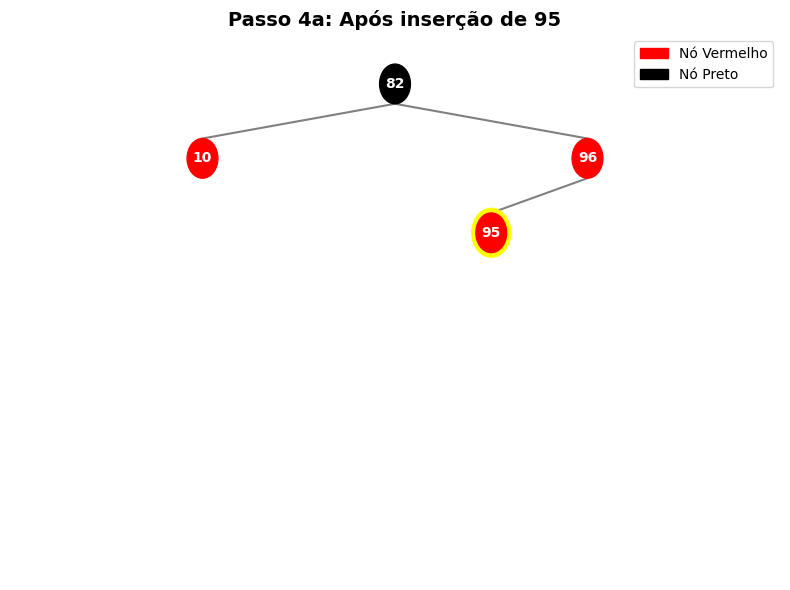

  ⚡ Caso 1: Recoloração (tio vermelho)

→ Balanceamento concluído


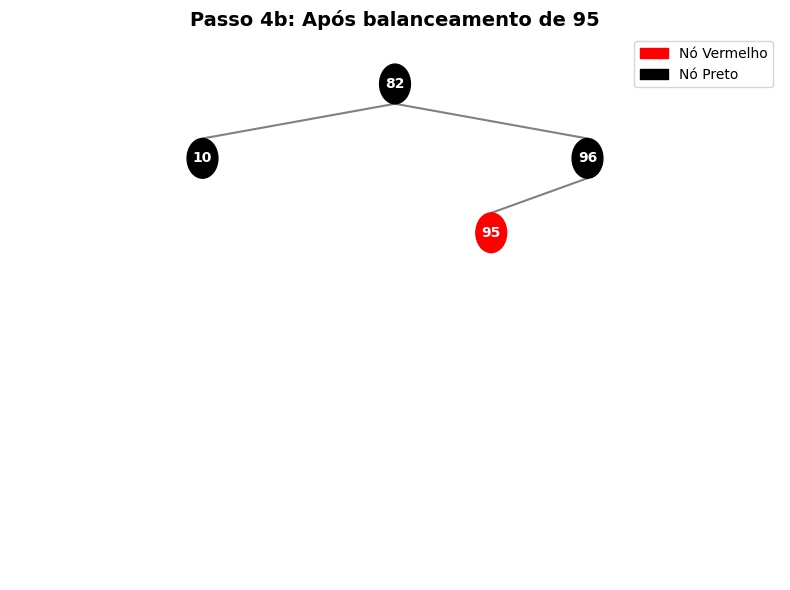


PASSO 5: Inserindo valor 38

→ Nó 38 inserido como VERMELHO


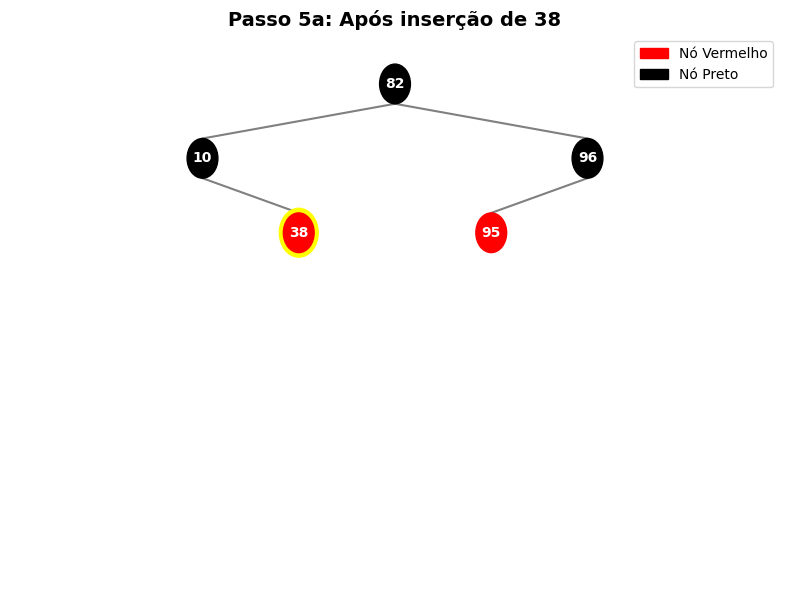


→ Balanceamento concluído


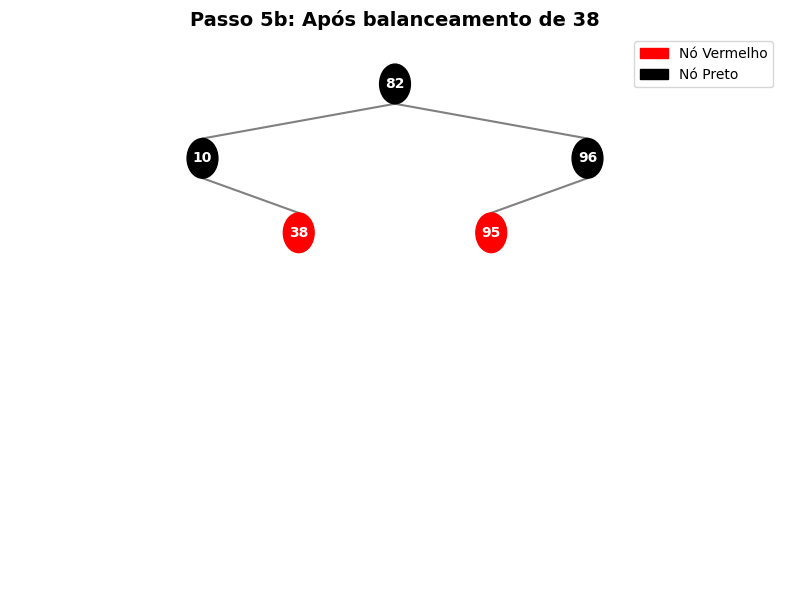


PASSO 6: Inserindo valor 69

→ Nó 69 inserido como VERMELHO


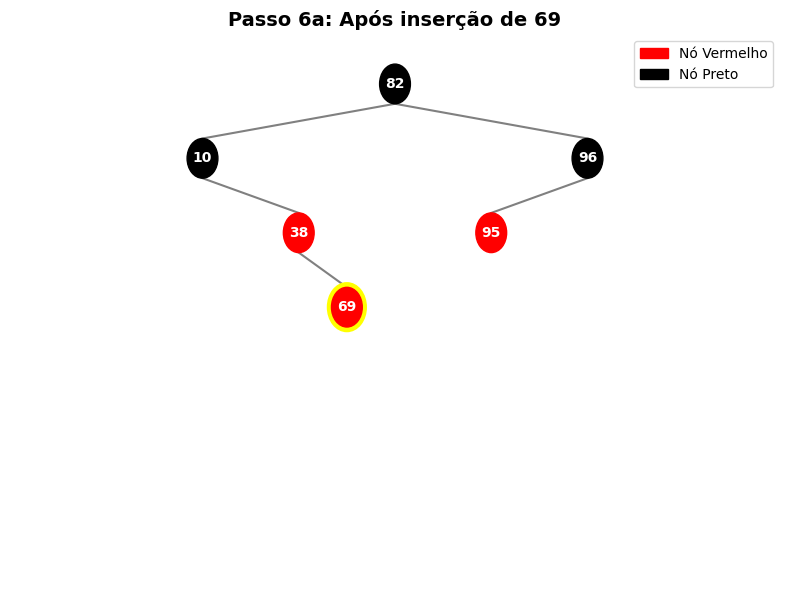

  ⚡ Caso 3: Recoloração e rotação
  ↻ Rotação à ESQUERDA em 10

→ Balanceamento concluído


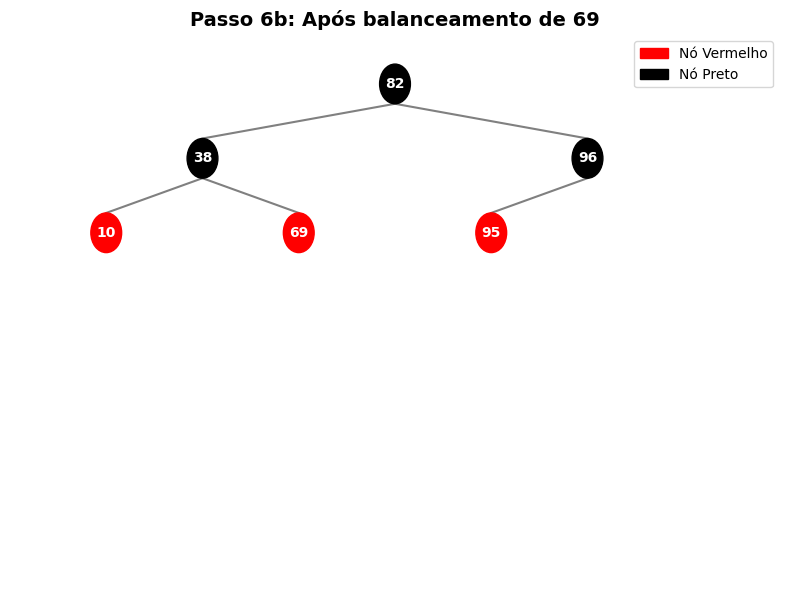


PASSO 7: Inserindo valor 54

→ Nó 54 inserido como VERMELHO


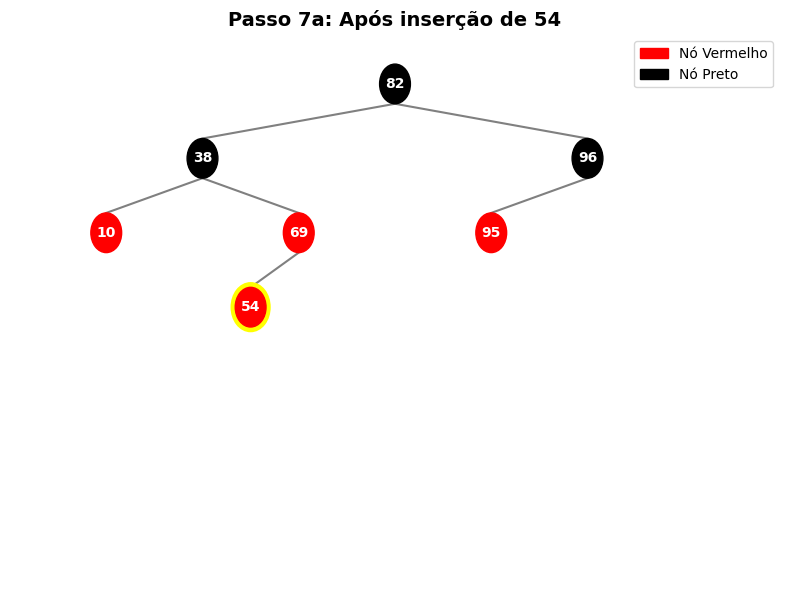

  ⚡ Caso 1: Recoloração (tio vermelho)

→ Balanceamento concluído


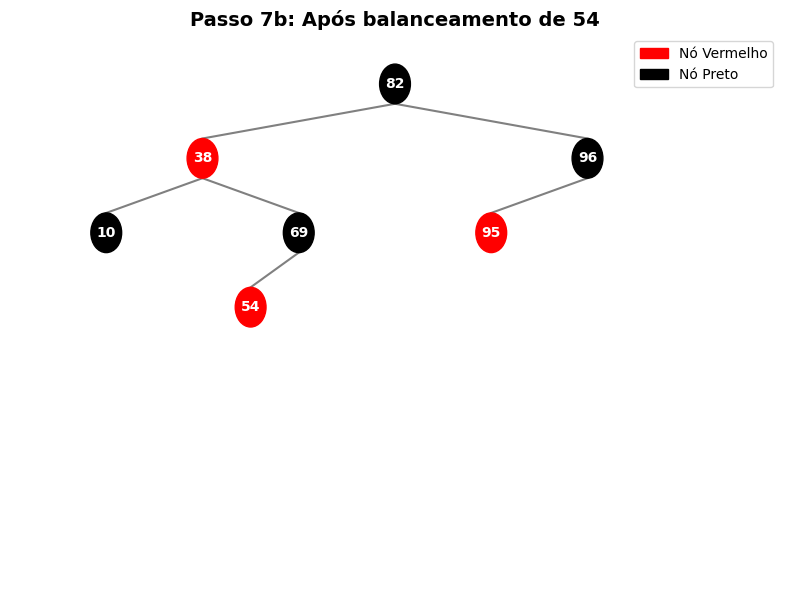


PASSO 8: Inserindo valor 77

→ Nó 77 inserido como VERMELHO


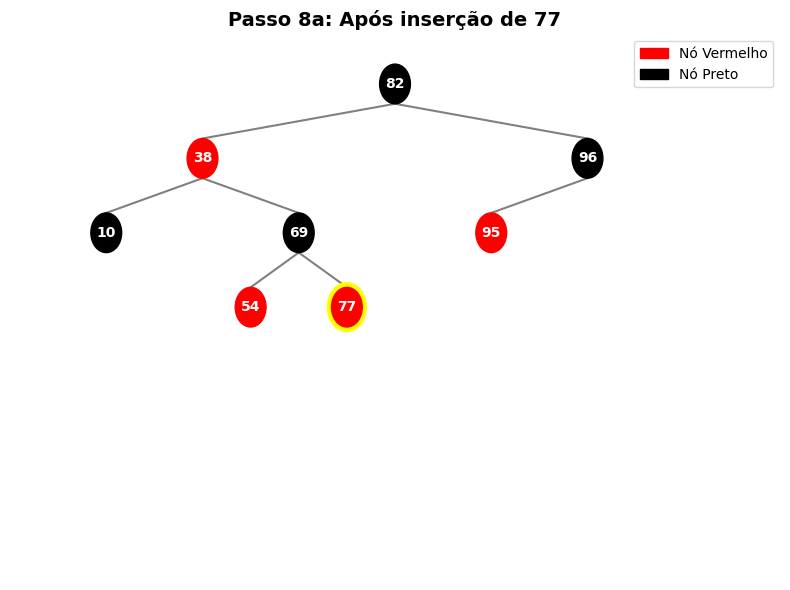


→ Balanceamento concluído


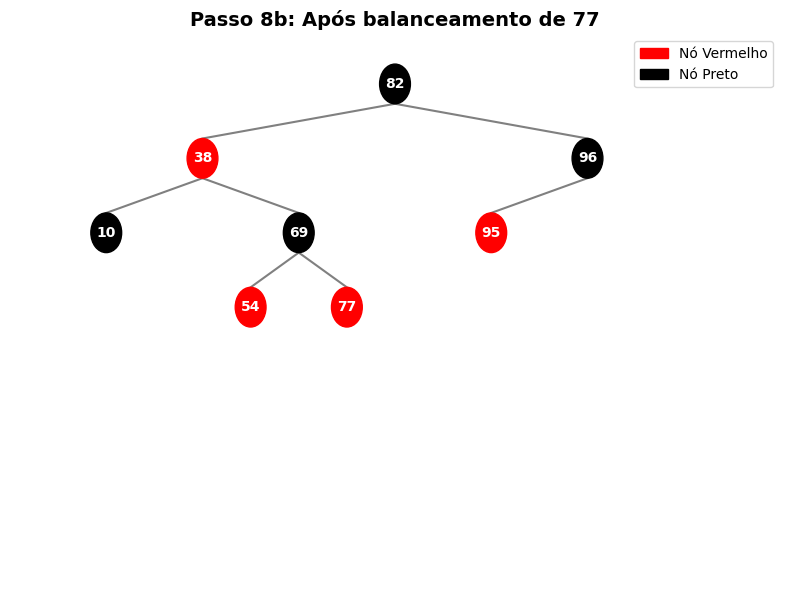


PASSO 9: Inserindo valor 43

→ Nó 43 inserido como VERMELHO


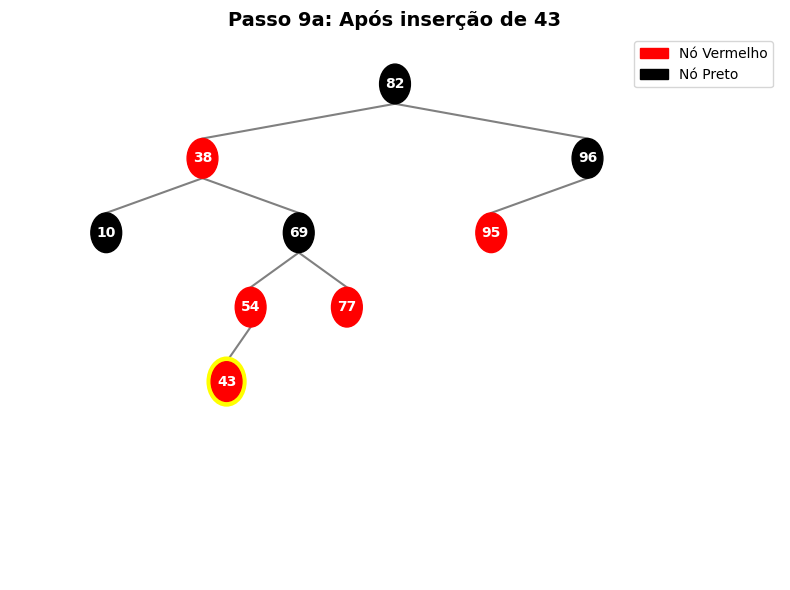

Caso 1: Recoloração (tio vermelho)
Caso 2: Nó é filho direito
  ↻ Rotação à ESQUERDA em 38
Caso 3: Recoloração e rotação
  ↺ Rotação à DIREITA em 82

→ Balanceamento concluído


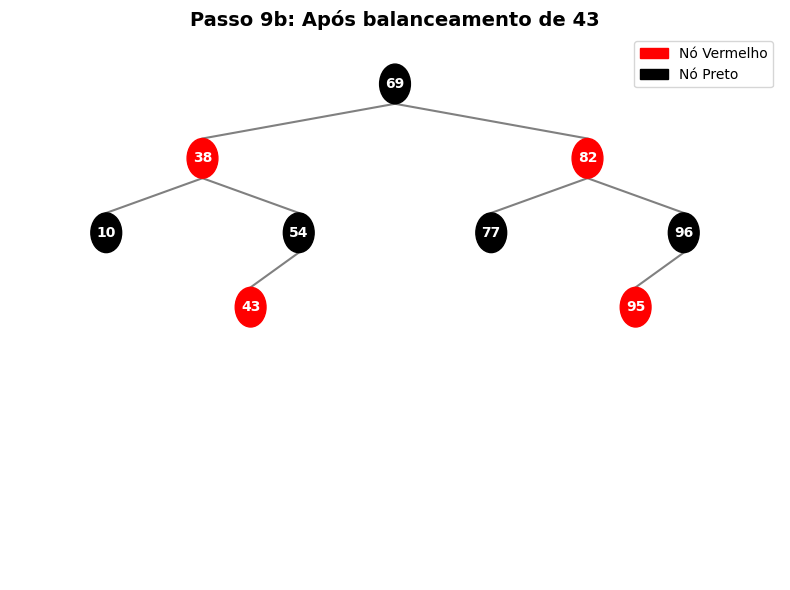


PASSO 10: Inserindo valor 19

→ Nó 19 inserido como VERMELHO


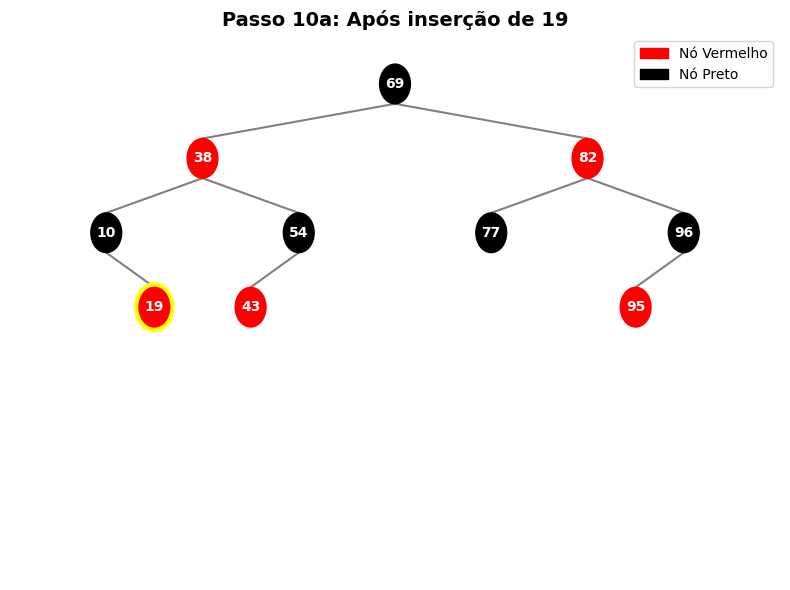


→ Balanceamento concluído


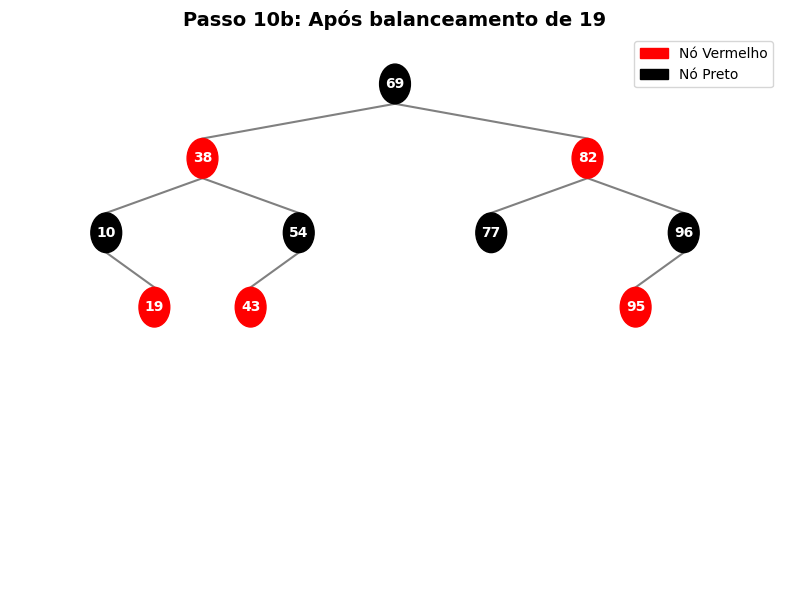


PASSO 11: Inserindo valor 26

→ Nó 26 inserido como VERMELHO


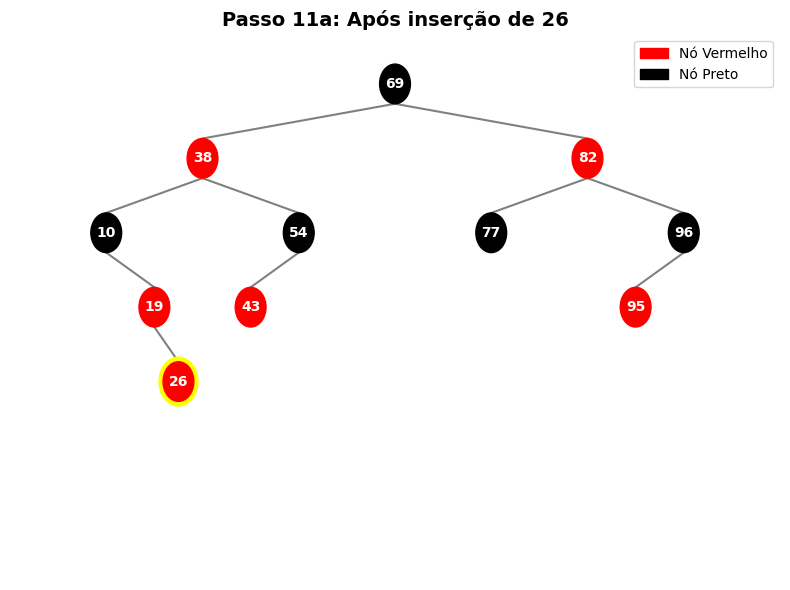

  ⚡ Caso 3: Recoloração e rotação
  ↻ Rotação à ESQUERDA em 10

→ Balanceamento concluído


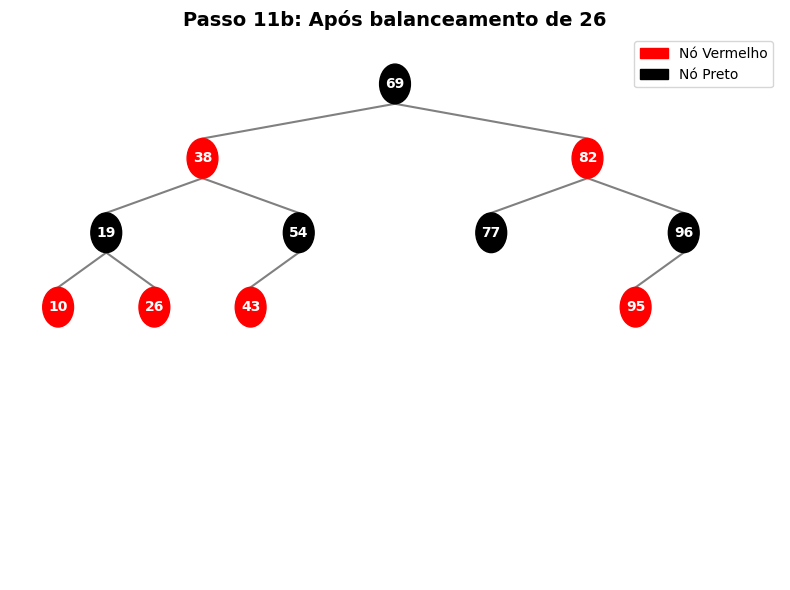


PASSO 12: Inserindo valor 58

→ Nó 58 inserido como VERMELHO


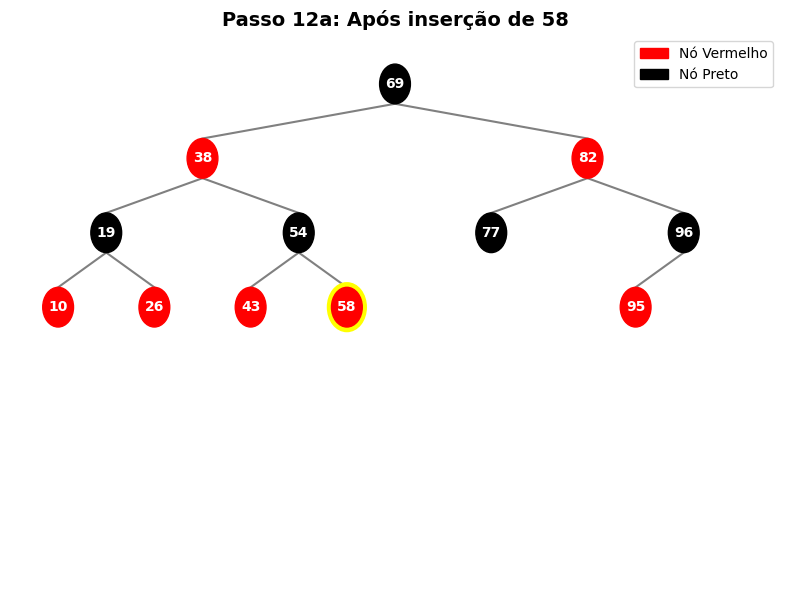


→ Balanceamento concluído


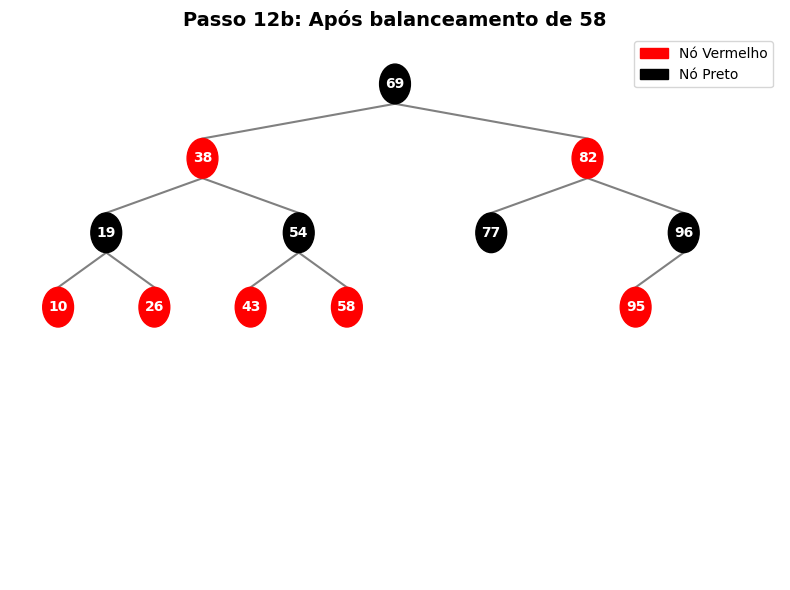


PASSO 13: Inserindo valor 81

→ Nó 81 inserido como VERMELHO


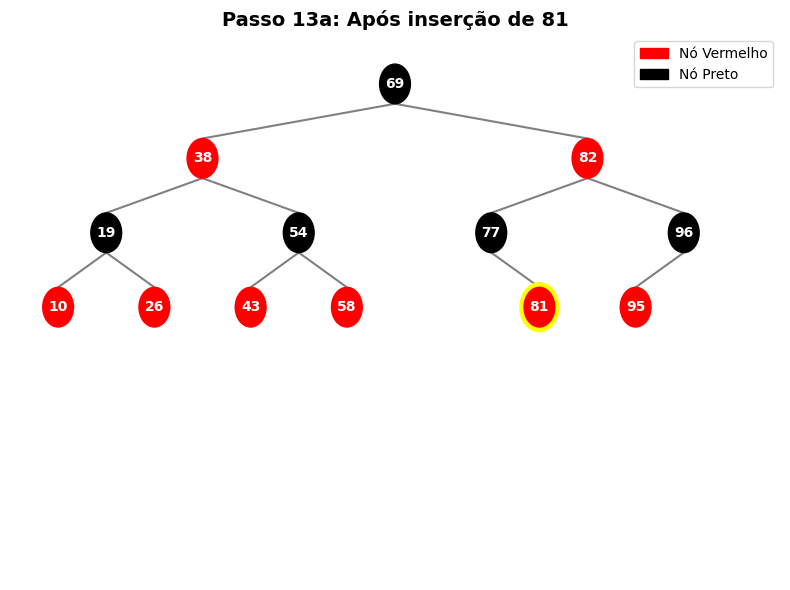


→ Balanceamento concluído


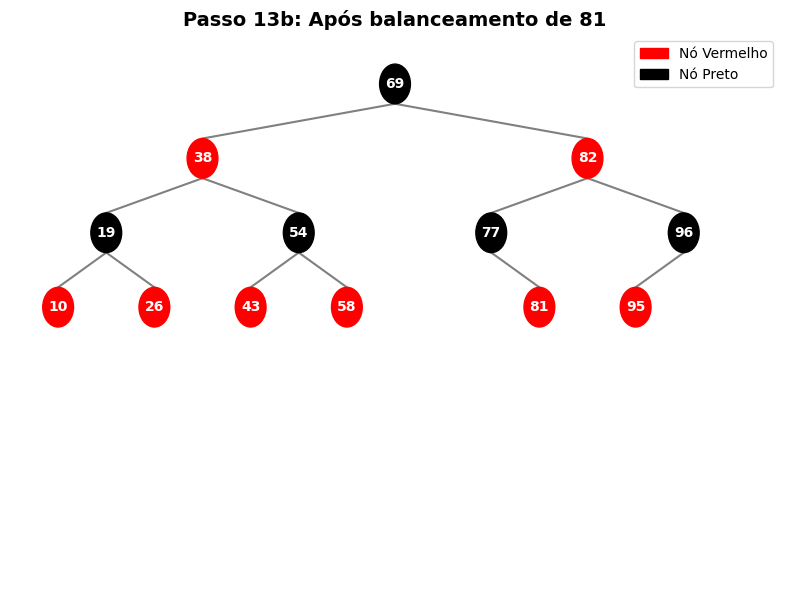


PASSO 14: Inserindo valor 93

→ Nó 93 inserido como VERMELHO


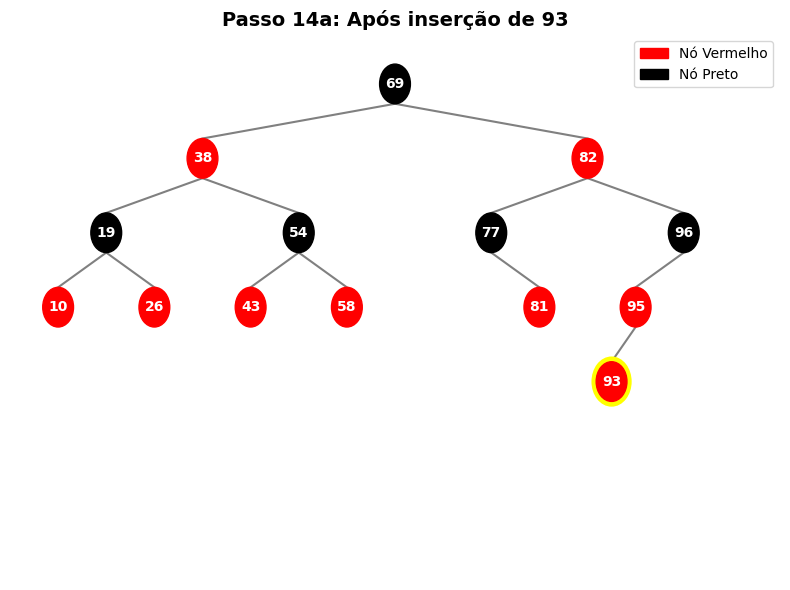

Caso 3: Recoloração e rotação
  ↺ Rotação à DIREITA em 96

→ Balanceamento concluído


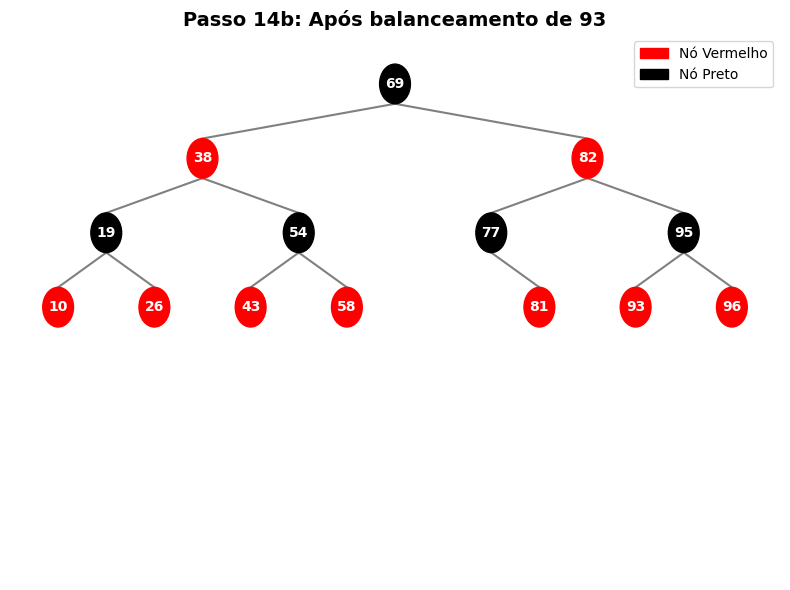


PASSO 15: Inserindo valor 25

→ Nó 25 inserido como VERMELHO


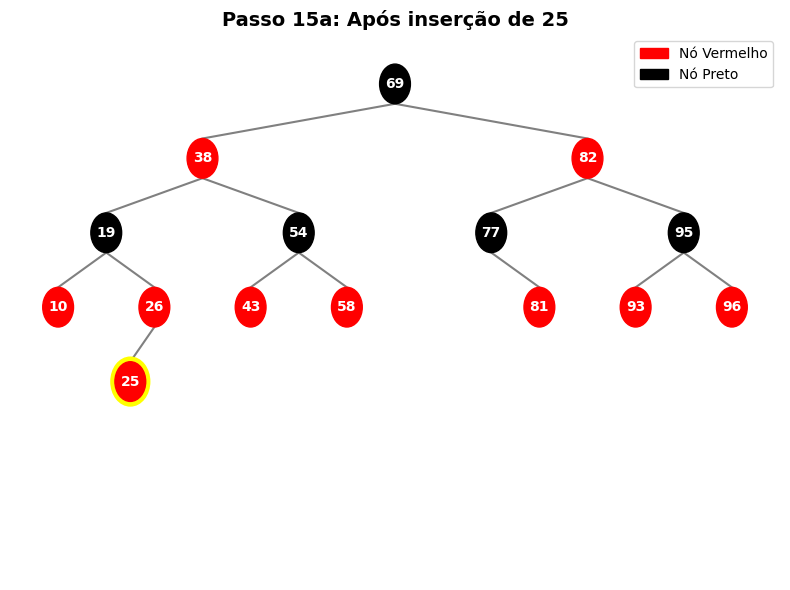

  ⚡ Caso 1: Recoloração (tio vermelho)
Caso 1: Recoloração (tio vermelho)

→ Balanceamento concluído


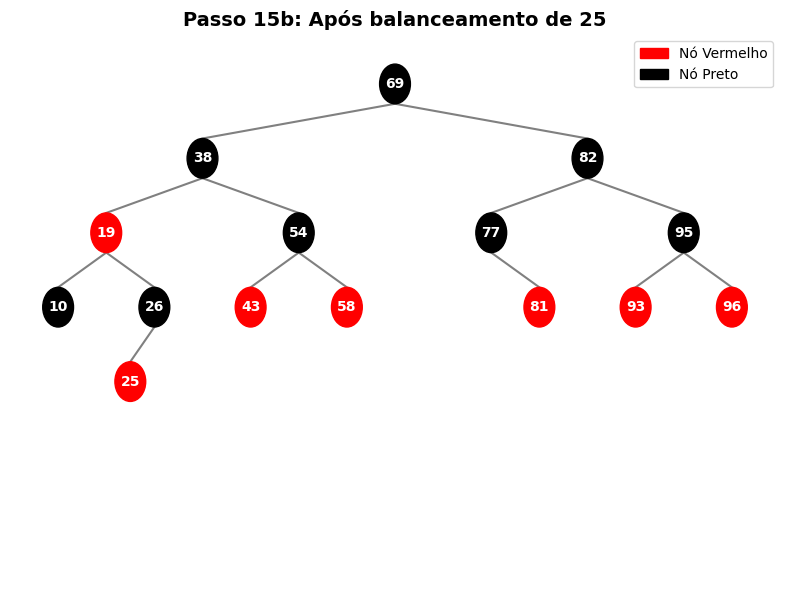


PASSO 16: Inserindo valor 2

→ Nó 2 inserido como VERMELHO


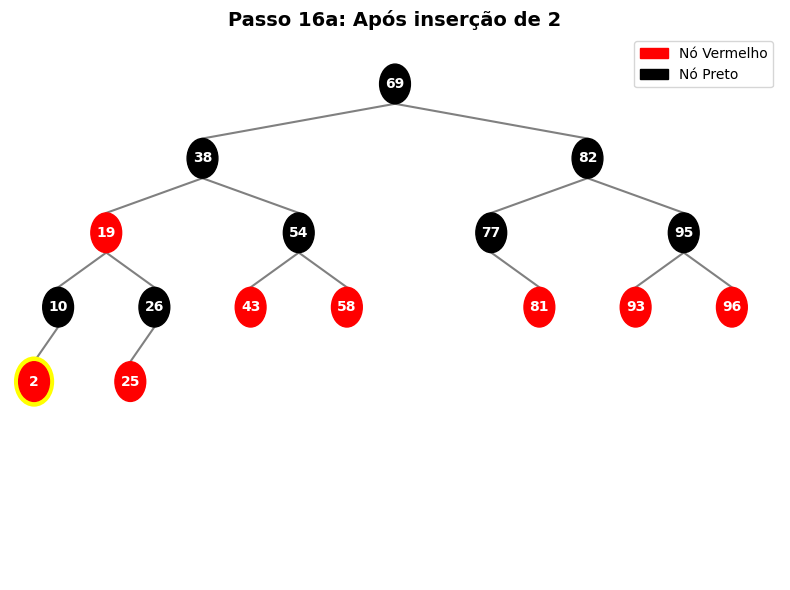


→ Balanceamento concluído


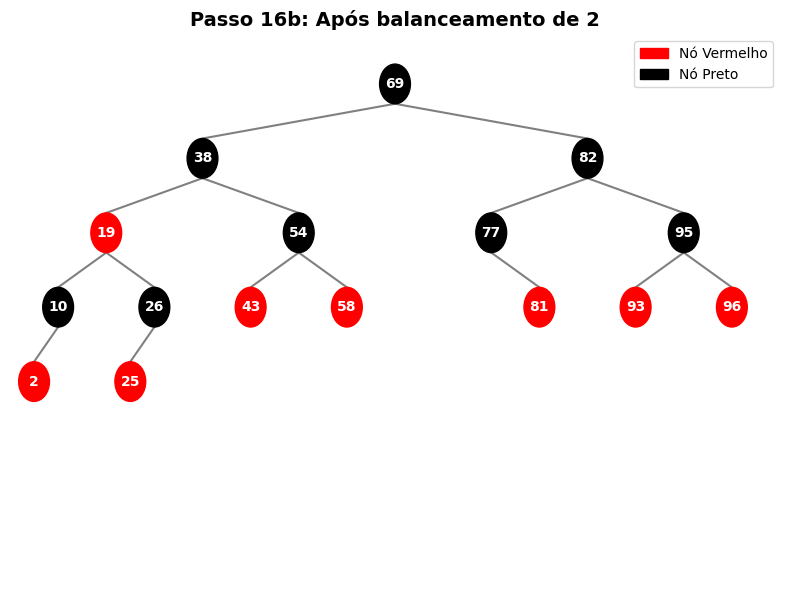


PASSO 17: Inserindo valor 40

→ Nó 40 inserido como VERMELHO


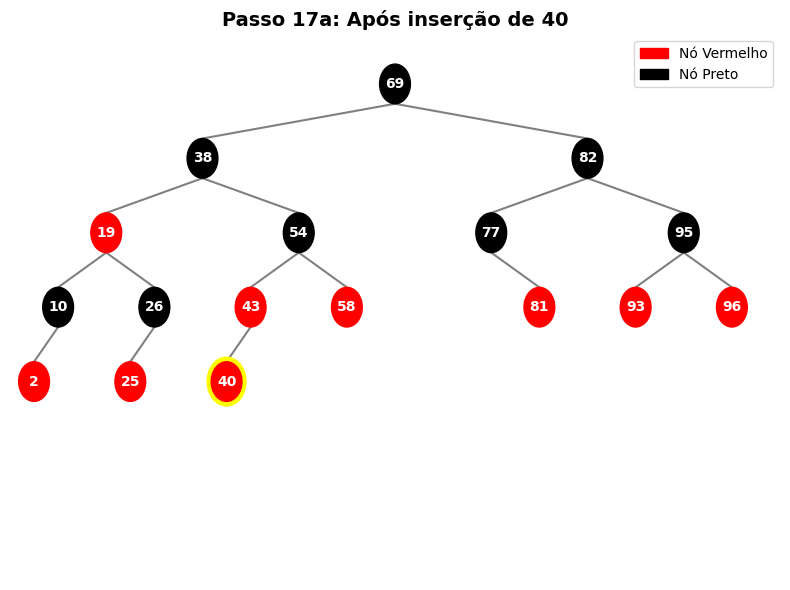

Caso 1: Recoloração (tio vermelho)

→ Balanceamento concluído


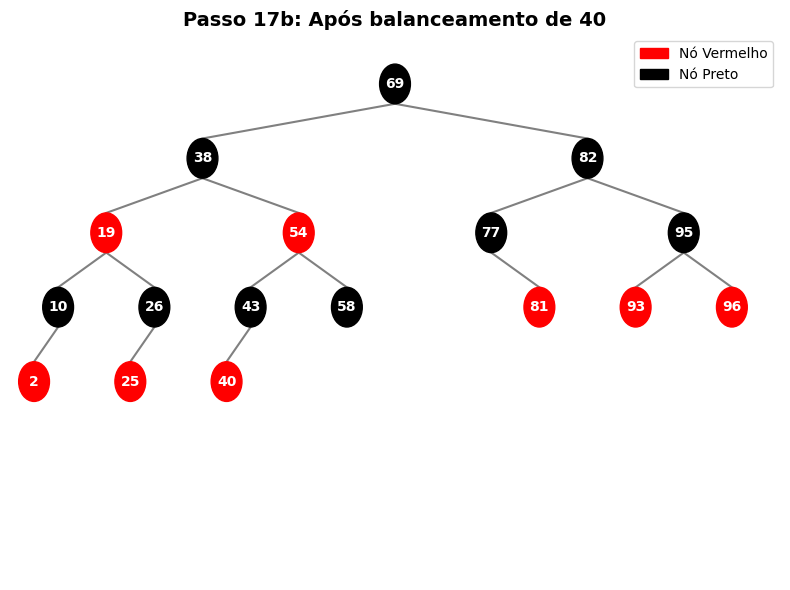


PASSO 18: Inserindo valor 76

→ Nó 76 inserido como VERMELHO


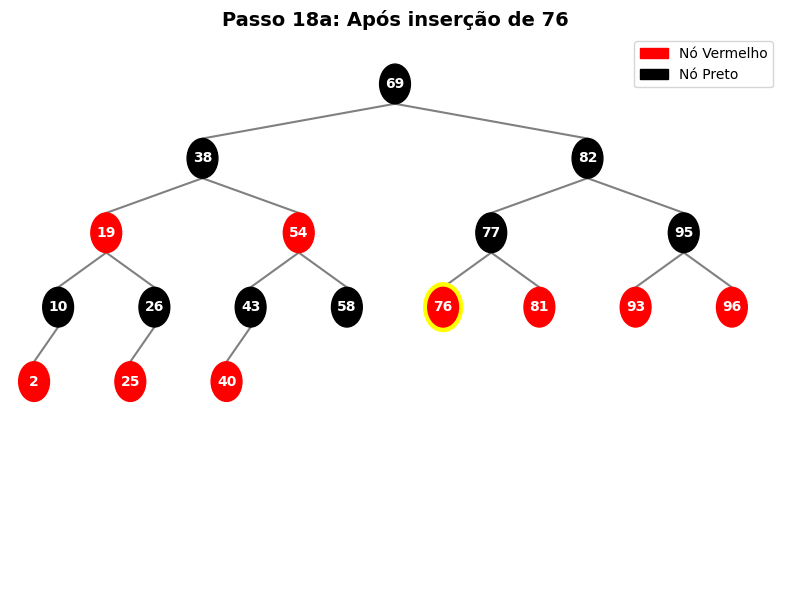


→ Balanceamento concluído


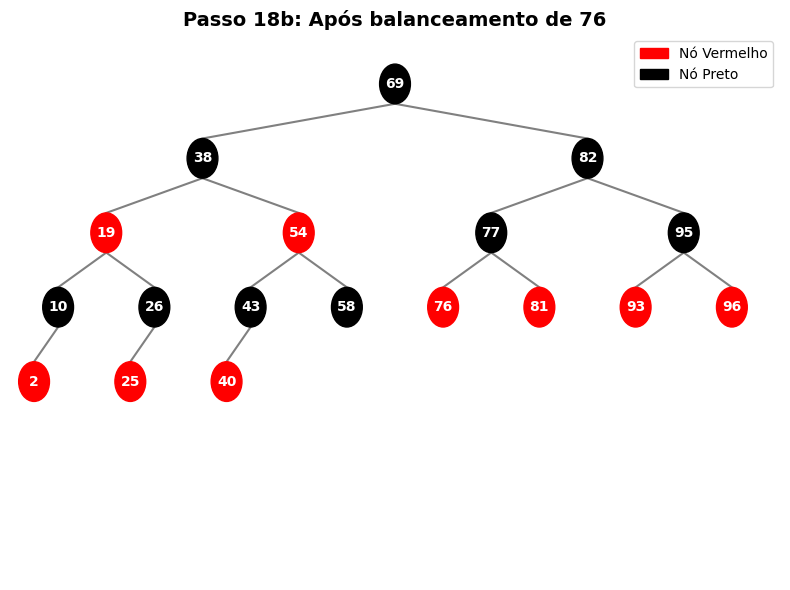


PASSO 19: Inserindo valor 53

→ Nó 53 inserido como VERMELHO


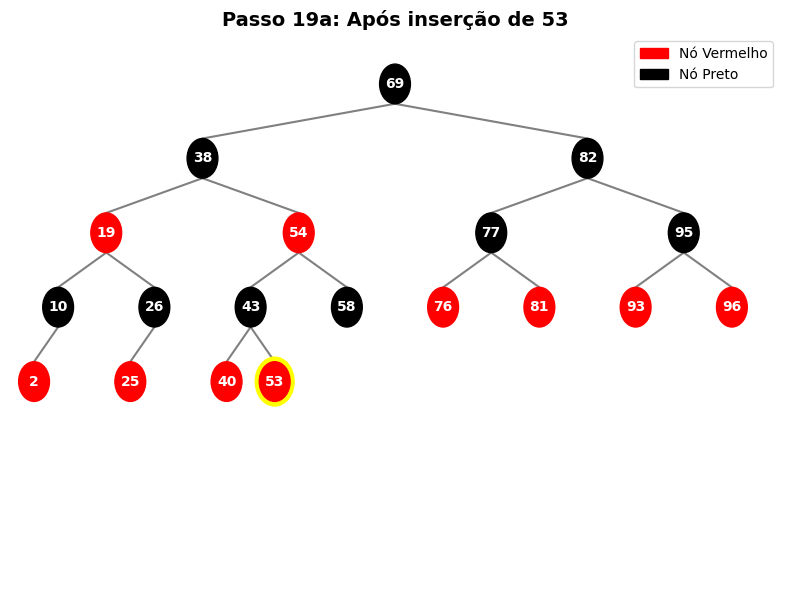


→ Balanceamento concluído


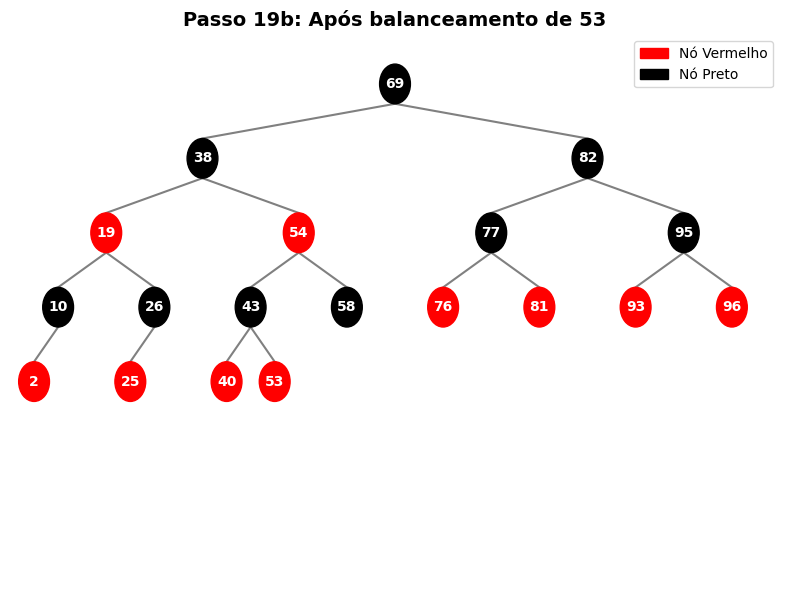


PASSO 20: Inserindo valor 16

→ Nó 16 inserido como VERMELHO


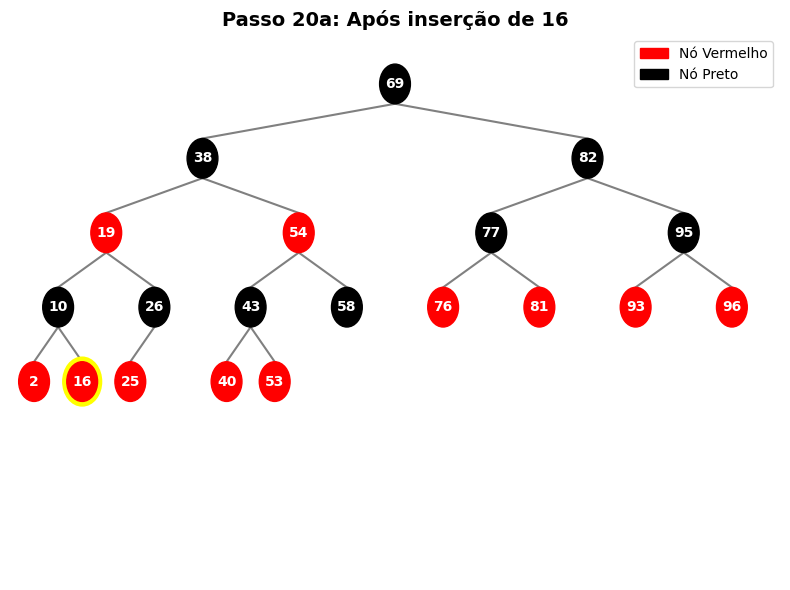


→ Balanceamento concluído


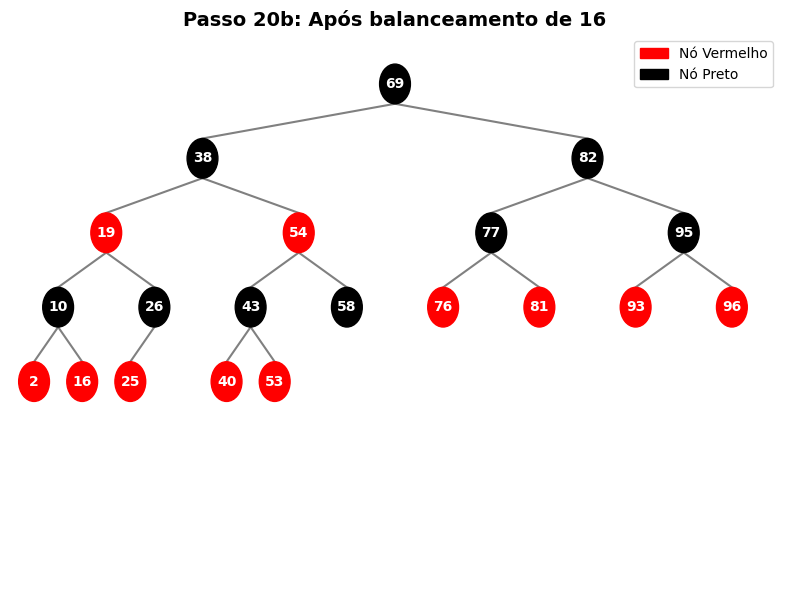


PASSO 21: Inserindo valor 33

→ Nó 33 inserido como VERMELHO


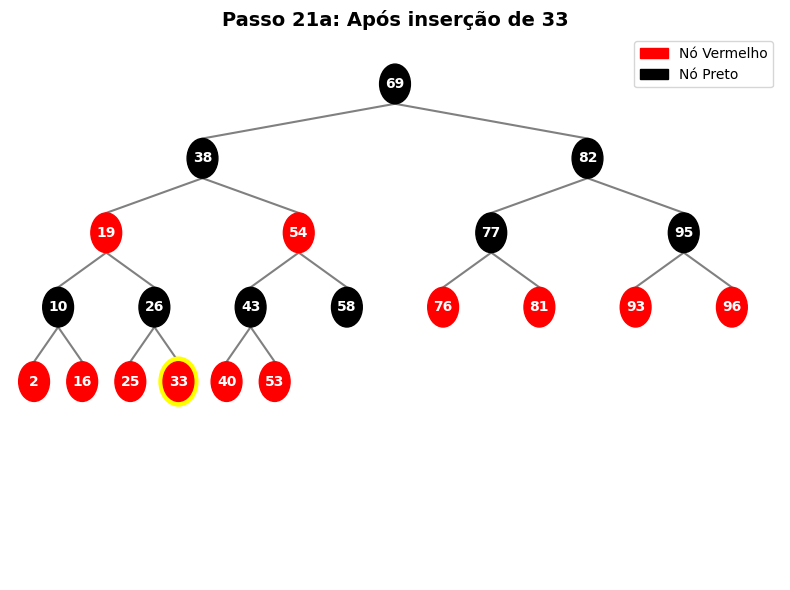


→ Balanceamento concluído


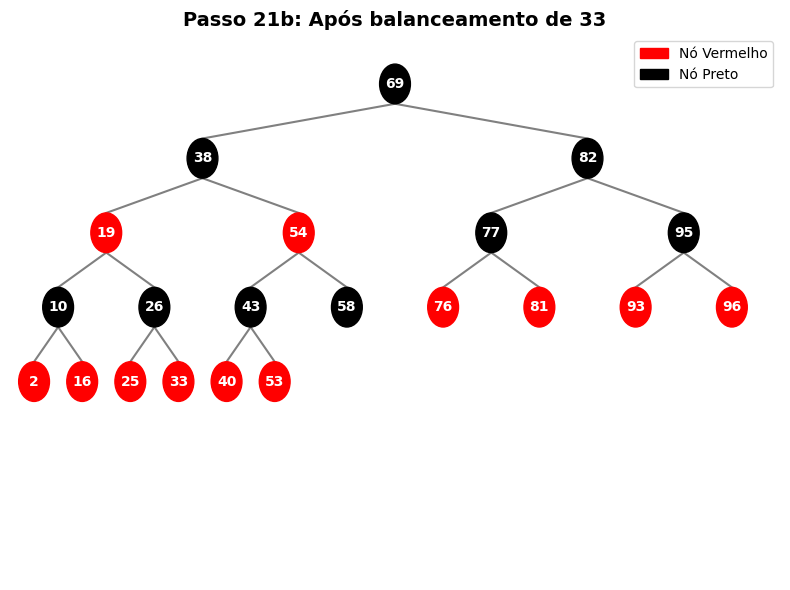


✅ ÁRVORE FINAL


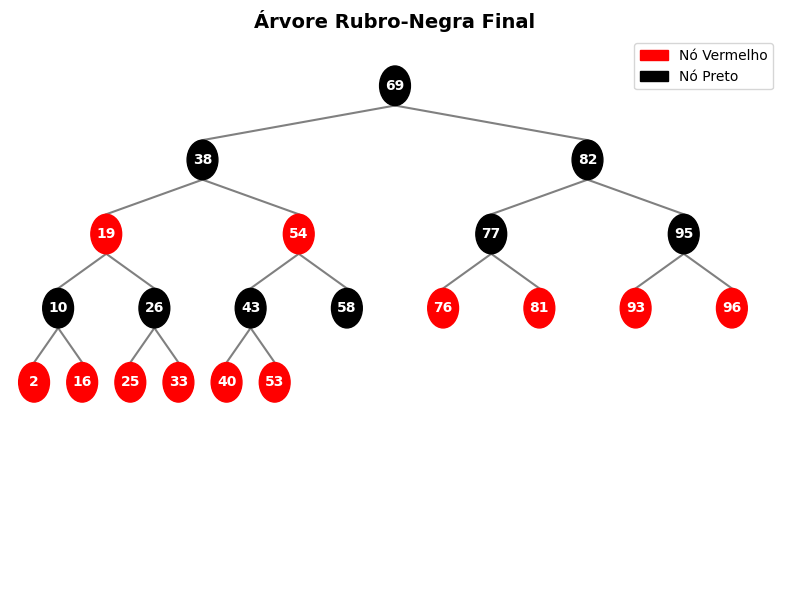

In [9]:
if __name__ == "__main__":
    import random
    
    arvore = ArvoreRubroNegra(visualizar_passos=True)
    
    valores = random.sample(range(1, 101), 21)

    print("\n🌳 VALORES ALEATÓRIOS GERADOS:")
    print(valores)
    print("\n" + "="*60)
    
    print("\n🌳 INSERINDO VALORES COM VISUALIZAÇÃO PASSO A PASSO\n")
    
    for valor in valores:
        arvore.inserir(valor)
    
    print("\n" + "="*60)
    print("✅ ÁRVORE FINAL")
    print("="*60)
    arvore.plotar_arvore("Árvore Rubro-Negra Final")